In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Hints on fireball, example pressure-wind speed scatterplot in altiar 

fireball = pd.read_csv("cneos_fireball_data.csv")

In [28]:
f = fireball  # I don't like typing eight-letter words if no one is watching

In [29]:
f["time"] = pd.to_datetime(f["Peak Brightness Date/Time (UT)"])
f["lat"] = f["Latitude (deg.)"]
f["lon"] = f["Longitude (deg.)"]

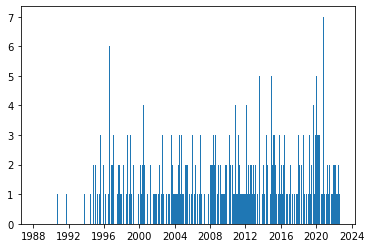

In [30]:
hist=plt.hist(f.time, bins=900)

In [31]:
# How wide are these bins?   ~34 years into 900 bins 
hist[1][1] - hist[1][0]

13.967766872428001

In [ ]:
# is 14 days.  So this plots fireballs [big enough for GEOS] to detect per fortnight.

Text(0, 0.5, 'time')

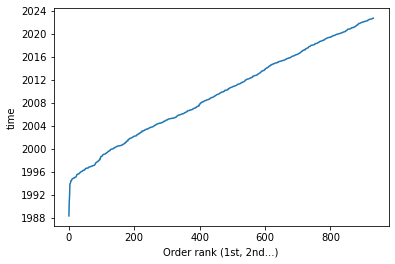

In [32]:
# Histograms are nice. What about cumulative plots?

plt.plot(np.arange(len(f)), f.time.sort_values())
plt.xlabel("Order rank (1st, 2nd...)")
plt.ylabel("time")

(0.0, 50.0)

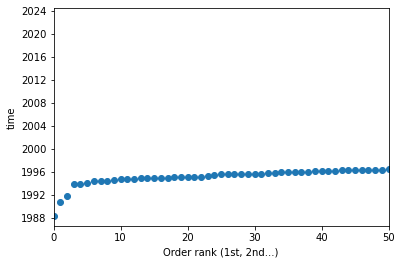

In [33]:
plt.plot(np.arange(len(f)), f.time.sort_values(), 'o')
plt.xlabel("Order rank (1st, 2nd...)")
plt.ylabel("time")
plt.xlim((0,50))

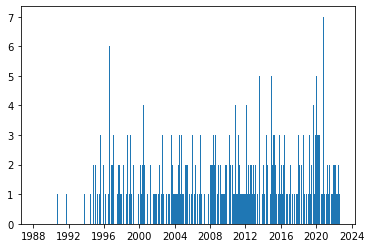

In [34]:
h={}
hoh = {}
h[900] = plt.hist(f.time, bins=900)

In [35]:
h[900][0].value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [36]:
# According to stackoverflow, the numpy equivalent of pd.value_counts() is
# https://stackoverflow.com/questions/70887293/equivalent-of-value-counts-of-pandas-in-numpy
unique, counts = np.unique(h[900][0], return_counts=True)
unique, counts
hoh[900] = (unique, counts)

Text(0.5, 1.0, 'The histogram of the histogram')

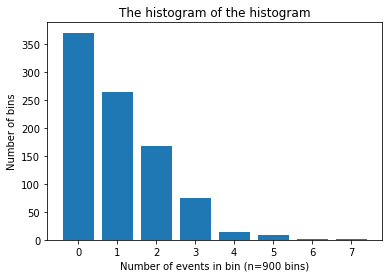

In [37]:
plt.bar(unique, counts)
plt.xlabel("Number of events in bin (n=900 bins)")
plt.ylabel("Number of bins")
plt.title("The histogram of the histogram")

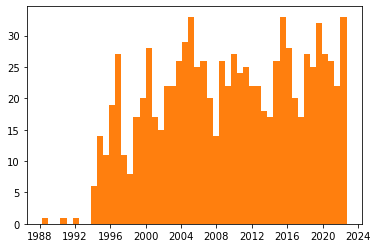

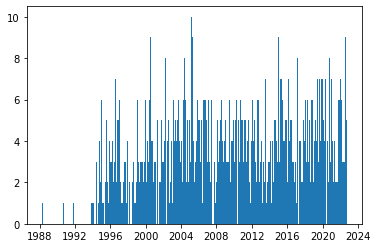

In [38]:
h[100] = plt.hist(f.time, bins=100)
hoh[100]= np.unique(h[100][0], return_counts=True)
h[50] = plt.hist(f.time, bins=50)
hoh[50]= np.unique(h[50][0], return_counts=True)
plt.figure()
h[300] = plt.hist(f.time, bins=300)
hoh[300]= np.unique(h[300][0], return_counts=True)


Text(0.5, 1.0, 'The histogram of the histogram')

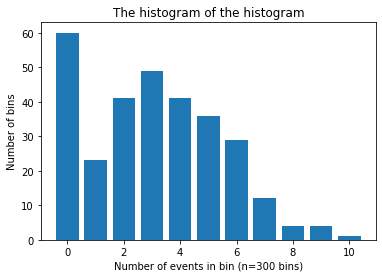

In [39]:
plt.bar(hoh[300][0], hoh[300][1])
plt.xlabel("Number of events in bin (n=300 bins)")
plt.ylabel("Number of bins")
plt.title("The histogram of the histogram")

In [ ]:
len(f), len(f) / 300

In [40]:
import scipy.stats
x = np.arange(0, 11); y = scipy.stats.poisson.pmf(x, 2.47333)

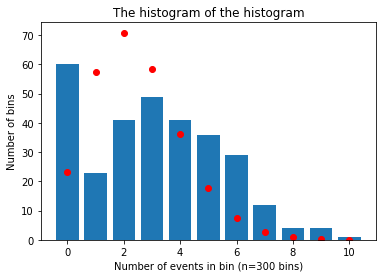

In [41]:
plt.bar(hoh[300][0], hoh[300][1])
plt.xlabel("Number of events in bin (n=300 bins)")
plt.ylabel("Number of bins")
plt.title("The histogram of the histogram")
plt.plot(x,y*300* (1-y[0]), 'o', color="red")

In [ ]:
plt.bar(hoh[100][0], hoh[100][1])
plt.xlabel("Number of events in bin (n=100 bins)")
plt.ylabel("Number of bins")
plt.title("The histogram of the histogram")

In [ ]:
# The spike at zero gives me pause.  A constant rate would give rise
# to a Poisson distribution here; a rate that fluctuates downward 
# and sometimes is roughly constant and other times is really small
# would do this.  I believe this spike at zero is real in the sense
# that it tells us something about the distribution that can't be
# calculated from the averages.

In [42]:
f.tail()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),time,lat,lon
927,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092,1993-11-29 17:48:41,26.5N,78.3E
928,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130,1993-10-31 03:39:27,51.3N,100.9W
929,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400,1991-10-04 09:22:47,78.7N,6.3E
930,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200,1990-10-01 03:51:47,7.5N,142.8E
931,1988-04-15 03:03:10,4.1S,124.3E,NaN,NaN,NaN,NaN,NaN,7.580000e+12,14.000,1988-04-15 03:03:10,4.1S,124.3E


In [43]:
f.drop(range(928,931+1)).tail()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),time,lat,lon
923,1994-06-15 00:02:26,45.0N,73.5W,NaN,NaN,NaN,NaN,NaN,4.100000e+10,0.140,1994-06-15 00:02:26,45.0N,73.5W
924,1994-06-03 20:48:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.090000e+11,1.300,1994-06-03 20:48:42,NaN,NaN
925,1994-05-29 09:30:58,52.8N,2.3E,NaN,NaN,NaN,NaN,NaN,3.840000e+11,1.000,1994-05-29 09:30:58,52.8N,2.3E
926,1994-02-01 22:38:09,2.7N,164.1E,NaN,NaN,NaN,NaN,NaN,1.820000e+13,30.000,1994-02-01 22:38:09,2.7N,164.1E
927,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092,1993-11-29 17:48:41,26.5N,78.3E


In [44]:
f=f.drop(range(928,931+1))

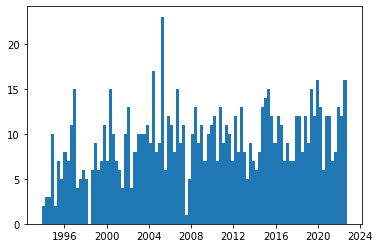

In [45]:
h={}
hoh = {}
h[100] = plt.hist(f.time, bins=100)

In [46]:
hoh[100] = np.unique(h[100][0], return_counts=True)


Text(0.5, 1.0, 'The histogram of the histogram')

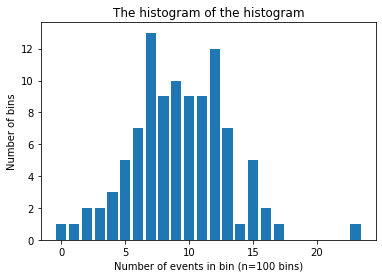

In [47]:
plt.bar(hoh[100][0], hoh[100][1])
plt.xlabel("Number of events in bin (n=100 bins)")
plt.ylabel("Number of bins")
plt.title("The histogram of the histogram")

In [48]:
f["Lat"] = np.float(f.lat[:-1]) * (1- 2* (f.lat[-1:] == "S" )) 
f["Long"] = np.float(f.long[:-1]) * (1- 2* (f.long[-1:] == "W" )) 

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_10607/211140652.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f["Lat"] = np.float(f.lat[:-1]) * (1- 2* (f.lat[-1:] == "S" ))


TypeError: cannot convert the series to <class 'float'>

In [ ]:
# Well, that didn't work.. convert to float..

In [50]:
f["Latitude (deg.)"].apply(lambda x: x[:-1])

TypeError: 'float' object is not subscriptable

In [ ]:
f = f[f.lat.notnull()]
f["Lat"] = np.float(f.lat[:-1]) * (1- 2* (f.lat[-1:] == "S" )) 

In [54]:
f.dtypes

Peak Brightness Date/Time (UT)                 object
Latitude (deg.)                                object
Longitude (deg.)                               object
Altitude (km)                                 float64
Velocity (km/s)                               float64
vx                                            float64
vy                                            float64
vz                                            float64
Total Radiated Energy (J)                     float64
Calculated Total Impact Energy (kt)           float64
time                                   datetime64[ns]
lat                                            object
lon                                            object
dtype: object

In [66]:

f = f.dropna()
f["Lat"] = (f.lat.apply(lambda x: float(str(x)[:-1]) ) * 
            f.lat.apply(lambda y: 1-2*(str(y)[-1:] == "S")))
f["Long"] = (f.lon.apply(lambda x: float(str(x)[:-1]) ) * 
            f.lon.apply(lambda y: 1-2*(str(y)[-1:] == "W")))


/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_10607/2897229349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f["Lat"] = (f.lat.apply(lambda x: float(str(x)[:-1]) ) *
/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_10607/2897229349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f["Long"] = (f.lon.apply(lambda x: float(str(x)[:-1]) ) *


In [63]:
f.lat.apply(lambda x: str(x)[:-1] )

0      22.7
1      40.8
2      20.0
3       6.3
4      35.0
       ... 
923    45.0
924      na
925    52.8
926     2.7
927    26.5
Name: lat, Length: 928, dtype: object

In [57]:
type(f.lat[0])

str

In [ ]:
# That does it.  

(array([ 2.,  3.,  2.,  8.,  3.,  6.,  2.,  8., 13.,  6.,  7.,  9.,  9.,
         9., 12.,  7.,  7., 10.,  8., 11., 12.,  3.,  4.,  6., 13., 10.,
        10., 11., 14.,  9.,  9.,  7.,  9.,  3.,  2.,  5.,  2.,  2.,  0.,
         2.]),
 array([-83.7  , -79.395, -75.09 , -70.785, -66.48 , -62.175, -57.87 ,
        -53.565, -49.26 , -44.955, -40.65 , -36.345, -32.04 , -27.735,
        -23.43 , -19.125, -14.82 , -10.515,  -6.21 ,  -1.905,   2.4  ,
          6.705,  11.01 ,  15.315,  19.62 ,  23.925,  28.23 ,  32.535,
         36.84 ,  41.145,  45.45 ,  49.755,  54.06 ,  58.365,  62.67 ,
         66.975,  71.28 ,  75.585,  79.89 ,  84.195,  88.5  ]),
 <BarContainer object of 40 artists>)

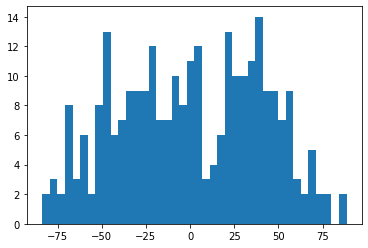

In [68]:
plt.hist(f.Lat, bins=40)

In [ ]:
plt.hist(f.Lat, bins=60)

(array([1., 0., 1., 0., 0., 1., 0., 2., 0., 0., 0., 2., 1., 4., 2., 1., 0.,
        2., 1., 0., 2., 1., 1., 2., 0., 0., 1., 1., 1., 4., 1., 2., 6., 2.,
        1., 4., 4., 2., 0., 0., 2., 3., 1., 1., 1., 5., 2., 1., 4., 1., 1.,
        3., 2., 2., 1., 4., 2., 6., 1., 3., 3., 1., 1., 2., 1., 2., 2., 2.,
        1., 1., 6., 2., 2., 1., 3., 2., 2., 0., 6., 3., 5., 1., 2., 4., 2.,
        1., 0., 0., 1., 0., 0., 3., 1., 0., 3., 2., 2., 6., 4., 1., 1., 2.,
        3., 4., 1., 2., 2., 5., 6., 0., 2., 3., 3., 5., 2., 4., 0., 3., 2.,
        4., 2., 2., 1., 4., 1., 2., 1., 3., 2., 1., 6., 0., 1., 2., 0., 0.,
        2., 0., 0., 0., 1., 0., 2., 2., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1.]),
 array([-83.7    , -82.62375, -81.5475 , -80.47125, -79.395  , -78.31875,
        -77.2425 , -76.16625, -75.09   , -74.01375, -72.9375 , -71.86125,
        -70.785  , -69.70875, -68.6325 , -67.55625, -66.48   , -65.40375,
        -64.3275 , -63.25125, -62.175  , -61.09875, -60.

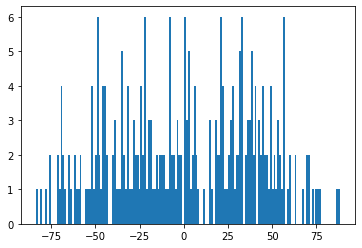

In [69]:
plt.hist(f.Lat, bins=160)

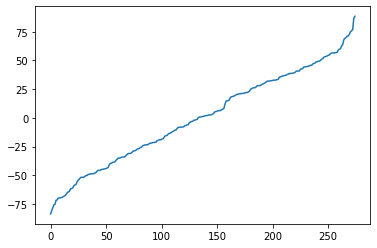

In [70]:
plt.plot(np.arange(len(f.Lat)), f.Lat.sort_values())

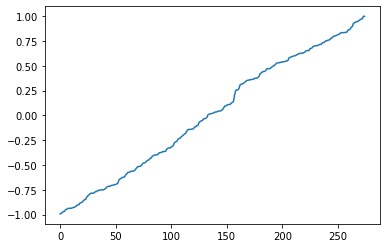

In [71]:
plt.plot(np.arange(len(f.Lat)), np.sin(np.radians(f.Lat.sort_values())))

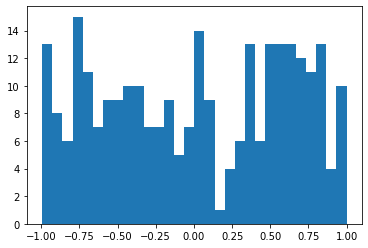

In [72]:
h = plt.hist(np.sin(np.radians(f.Lat)), bins=30)

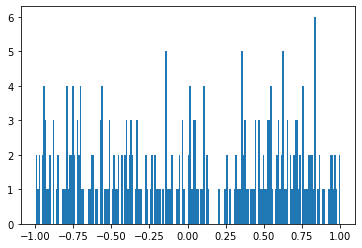

In [73]:
h = plt.hist(np.sin(np.radians(f.Lat)), bins=200)

In [74]:
hoh = np.unique(h[0], return_counts=True) 

<BarContainer object of 7 artists>

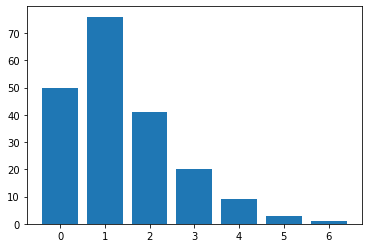

In [75]:
plt.bar(hoh[0], hoh[1])

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),time,lat,lon,Lat,Long
1,2022-09-14 23:31:15,40.8N,63.4E,35.8,17.4,-13.9,-4.3,9.5,3.200000e+10,0.110,2022-09-14 23:31:15,40.8N,63.4E,40.8,63.4
2,2022-09-04 03:54:55,20.0N,165.9E,14.0,21.9,18.4,-11.4,-3.5,2.400000e+10,0.086,2022-09-04 03:54:55,20.0N,165.9E,20.0,165.9
5,2022-07-28 01:36:08,6.0S,86.9W,37.5,29.9,-17.1,23.5,-7.2,2.510000e+11,0.680,2022-07-28 01:36:08,6.0S,86.9W,-6.0,-86.9
6,2022-07-27 04:41:30,44.8S,2.9W,38.1,19.8,-6.1,17.7,6.5,5.240000e+11,1.300,2022-07-27 04:41:30,44.8S,2.9W,-44.8,-2.9
7,2022-07-25 07:28:17,40.5S,76.6E,33.6,15.2,-2.1,-2.2,14.9,8.700000e+10,0.270,2022-07-25 07:28:17,40.5S,76.6E,-40.5,76.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,2004-04-22 04:21:49,44.3S,83.3E,29.6,16.3,8.5,-12.1,-6.8,6.240000e+11,1.500,2004-04-22 04:21:49,44.3S,83.3E,-44.3,83.3
662,2004-04-06 03:24:49,12.0S,162.8E,35.0,25.6,10.5,-23.2,-2.9,4.330000e+11,1.100,2004-04-06 03:24:49,12.0S,162.8E,-12.0,162.8
673,2003-11-10 13:54:06,64.5S,136.2E,23.0,20.1,14.8,-8.7,10.4,5.180000e+11,1.300,2003-11-10 13:54:06,64.5S,136.2E,-64.5,136.2
678,2003-09-27 12:59:02,21.0N,86.6E,26.0,18.2,-1.0,-5.4,-17.3,2.150000e+12,4.600,2003-09-27 12:59:02,21.0N,86.6E,21.0,86.6


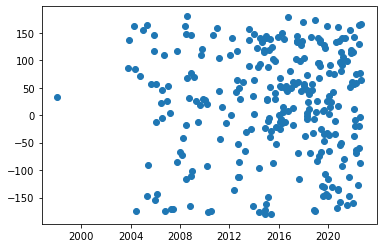

In [76]:
plt.scatter(f.time, f.Long)
vsubset = f.loc[ f.vx > 0] 
f

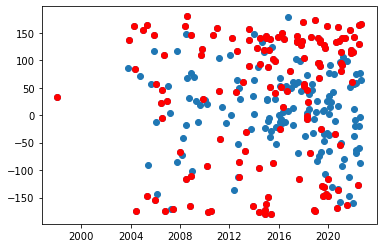

In [77]:
vsubset = f.loc[ f.vx > 0] 
plt.scatter(f.time, f.Long)
plt.scatter(vsubset.time, vsubset.Long, color="red")

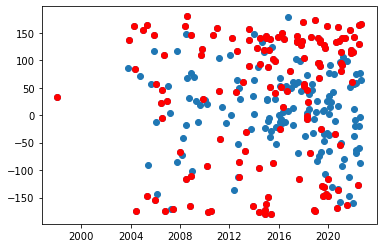

In [78]:
vsubset = f.loc[ f.vx > 0] 
plt.scatter(f.time, f.Long)
plt.scatter(vsubset.time, vsubset.Long, color="red")

In [ ]:
s = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/dplyr/storms.csv")
s.head()


In [ ]:
iota = s.query("name == 'Iota' & year == 2020")
iota.head()

In [ ]:
s.groupby(["status", "category"]).name.count()

In [ ]:
import altair as alt

In [ ]:
alt.Chart(iota).mark_point().encode(
    alt.X('pressure:Q',        scale=alt.Scale(zero=False)),
    y='wind:Q',
    color='status:N',
    size='category:O'
)

In [ ]:
alt.Chart(iota).mark_point().encode(
    alt.X('pressure:Q',        scale=alt.Scale(zero=False)),
    y='wind:Q',
    color='status:N',
    size='category:O'
)

In [ ]:
lookup = { -1: "tropical depression", 
          0: "tropical storm", 
          1: "Category 1 hurricane",
          2: "Category 2 hurricane",
          3: "Category 3 hurricane", 
          4: "Category 4 hurricane", 
          5: "Category 5 hurricane" }
iota["prettycat"] = iota.category.apply(lambda x: lookup[x])

In [ ]:
iota[["status", "category", "prettycat"]]

In [ ]:
alt.Chart(iota).mark_point().encode(
    alt.X('pressure:Q',        scale=alt.Scale(zero=False)),
    y='wind:Q',
    color='prettycat:N',
)

In [ ]:
# bigger markers.. mark_point(size= , filled=True) 
alt.Chart(iota).mark_point(size=100, filled=True).encode(
    alt.X('pressure:Q',        scale=alt.Scale(zero=False)),
    y='wind:Q',
    color='prettycat:N',
)

In [ ]:
# And I can fine-tune the scale within alt.X  with scale=alt.Scale(domain=(5, 20))
# bigger markers.. mark_point(size= , filled=True) 
alt.Chart(iota, title="Hurricane Iota (2020)").mark_point(size=150, filled=True, ).encode(
    alt.X('pressure:Q',        
          scale=alt.Scale(domain= (900, 1020)), 
          title="Pressure (mbar)"
         ),
    alt.Y('wind:Q',
          title="Max. sustained wind speed (mph)"),
    alt.Color('prettycat:N',legend=alt.Legend(title="Safir-Simpson category") )

) 

In [ ]:
# And I can fine-tune the scale within alt.X  with scale=alt.Scale(domain=(5, 20))
# bigger markers.. mark_point(size= , filled=True) 
alt.Chart(iota, title="Hurricane Iota (2020)").mark_point(size=150, filled=True, ).encode(
    alt.X('pressure:Q',        
          scale=alt.Scale(domain= (900, 1020)), 
          title="Pressure (mbar)"
         ),
    alt.Y('wind:Q',
          title="Max. sustained wind speed (mph)"),
    alt.Color('prettycat:N',legend=alt.Legend(title="Safir-Simpson category")),
             alt.Size("tropicalstorm_force_diameter:Q")

) 

In [ ]:
# scale=alt.Scale(range=[100, 500] ) $ to be added to alt.Size

In [ ]:
alt.Chart(iota, title="Hurricane Iota (2020)").mark_point(size=150, filled=True, ).encode(
    alt.X('pressure:Q',        
          scale=alt.Scale(domain= (900, 1020)), 
          title="Pressure (mbar)"
         ),
    alt.Y('wind:Q',
          title="Max. sustained wind speed (mph)"),
    alt.Color('prettycat:N',legend=alt.Legend(title="Safir-Simpson category")),
             alt.Size("tropicalstorm_force_diameter:Q", 
                      scale=alt.Scale(range=[-200, 500] ))

)   # unsuccessful .. I dont' know how much we can fine-tune some of the channels.

In [ ]:
grades = [14,14,14,14,15,15,15,15,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20]
plt.step(range(len(grades)), grades)
plt.xlabel("Student rank", fontsize=20)
plt.ylabel("HW1 score", fontsize=20)
plt.savefig("Hw1scores.png", dpi=300)

In [ ]:
re_data= f
for i in re_data["Longitude (deg.)"]:
    if "W" in i:
#         re_data["Long_Updated"][i] = -1*float(str.replace(i,"W",""))
        print(-1*float(str.replace(i,"W","")))
    else:
        print(i)

In [ ]:
f